# **Fraud Detection**

**Tech Stack**: Python, Pandas, NumPy, Scikit-learn, XGBoost, Matplotlib, Seaborn, Imbalanced-learn.

**Dataset**: 'Paysim.csv' from Kaggle

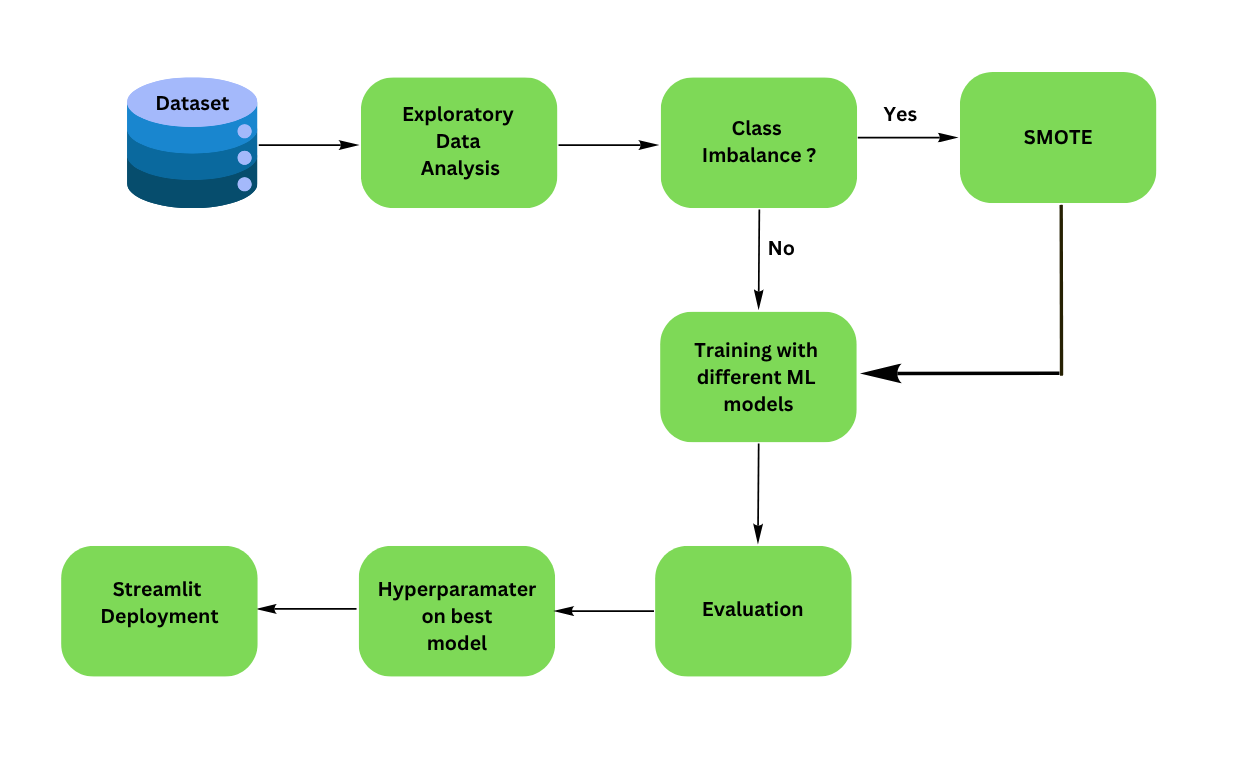

In [15]:
from IPython.display import Image

img = Image(filename='project_flow.png')
display(img)

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Dataset ingestion

df = pd.read_csv('./dataset/Paysim.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Basic analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
print("\nFraud Percentage: {:.2f}%".format(df['isFraud'].mean() * 100))


Fraud Percentage: 0.13%


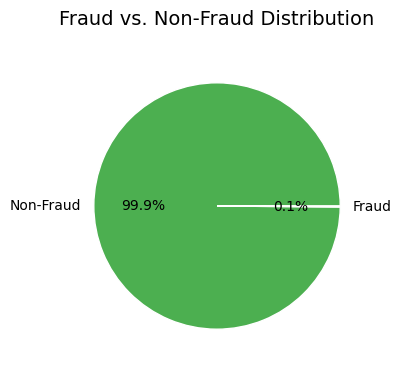

In [7]:
plt.figure(figsize=(4, 4))
fraud_counts = df['isFraud'].value_counts()
colors = ['#4CAF50', '#F44336']
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], 
        autopct='%1.1f%%', colors=colors, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Fraud vs. Non-Fraud Distribution', fontsize=14, pad=20)
plt.show()

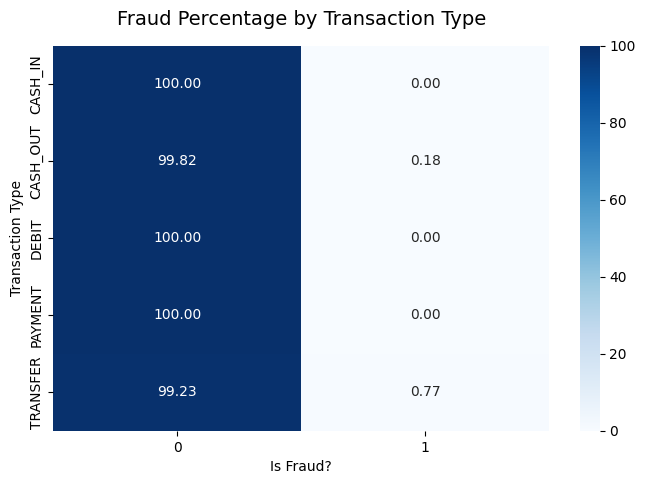

In [8]:
fraud_by_type = pd.crosstab(df['type'], df['isFraud'], normalize='index') * 100
plt.figure(figsize=(8, 5))
sns.heatmap(fraud_by_type, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Fraud Percentage by Transaction Type', fontsize=14, pad=15)
plt.xlabel('Is Fraud?')
plt.ylabel('Transaction Type')
plt.show()

In [9]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, StandardScaler

df['type'] = LabelEncoder().fit_transform(df['type'])

df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

X = df.drop('isFraud', axis=1)
y = df['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

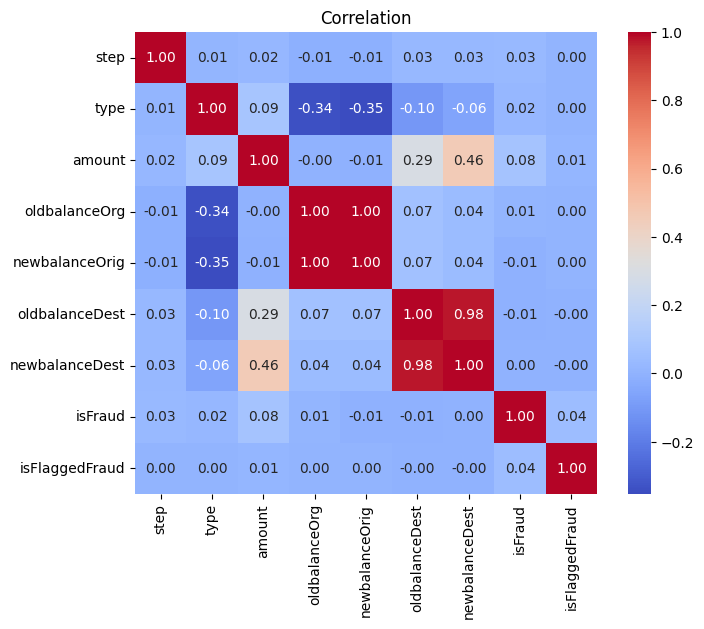

In [12]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation')
plt.show()

In [70]:
# Class balancing using SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_smote).value_counts())

isFraud
0    4448085
1    4448085
Name: count, dtype: int64


**Training and Evaluation**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94   1335520
           1       0.97      0.91      0.94   1333331

    accuracy                           0.94   2668851
   macro avg       0.94      0.94      0.94   2668851
weighted avg       0.94      0.94      0.94   2668851

AUC-ROC: 0.9409

Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1335520
           1       0.95      1.00      0.97   1333331

    accuracy                           0.97   2668851
   macro avg       0.97      0.97      0.97   2668851
weighted avg       0.97      0.97      0.97   2668851

AUC-ROC: 0.9720

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1335520
           1       1.00      1.00      1.00   1333331

    accuracy                           1.00   2668851
   macro avg

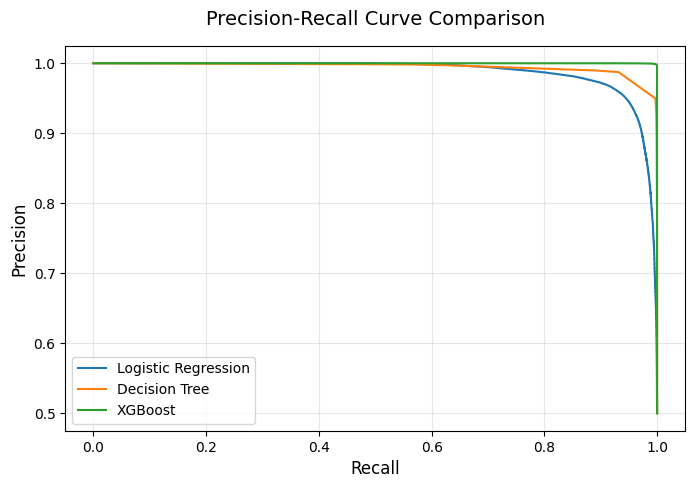

In [72]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8, 5))
for name, model in models.items():
    probas = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, probas)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve Comparison', fontsize=14, pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Cross validation

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_model = XGBClassifier()
xgb_scores = cross_val_score(xgb_cv_model, X_train_smote, y_train_smote, cv=cv, scoring='f1')
print("\nXGBoost Cross-Validation F1 Scores:", xgb_scores)
print("Average F1 Score:", np.mean(xgb_scores))


XGBoost Cross-Validation F1 Scores: [0.99831645 0.99833826 0.99828598 0.99832658 0.99843539]
Average F1 Score: 0.9983405312006713


In [ ]:
# Cross validation on original data

from sklearn.metrics import average_precision_score, f1_score

df = pd.read_csv('./dataset/Paysim.csv')
df['type'] = LabelEncoder().fit_transform(df['type'])
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
X = df.drop('isFraud', axis=1)
y = df['isFraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

results = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_orig)
    auc = roc_auc_score(y_test_orig, y_pred)
    results[name] = {
        "model": model,
        "f1_score": f1_score(y_test_orig, y_pred),
        "auc": auc,
        "report": classification_report(y_test_orig, y_pred, output_dict=True),
        "pr_auc": average_precision_score(y_test_orig, model.predict_proba(X_test_orig)[:,1])
    }
    print(f"\n{name} Performance on Original Imbalanced Test Set:")
    print(classification_report(y_test_orig, y_pred))
    print(f"AUC-ROC: {auc:.4f}")
    print(f"PR AUC: {results[name]['pr_auc']:.4f}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_model = XGBClassifier()
xgb_scores = cross_val_score(xgb_cv_model, X_train_smote, y_train_smote, cv=cv, scoring='f1')
print("\nXGBoost Cross-Validation F1 Scores:", xgb_scores)
print("Average F1 Score:", np.mean(xgb_scores))


Logistic Regression Performance on Original Imbalanced Test Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1906322
           1       0.04      0.90      0.07      2464

    accuracy                           0.97   1908786
   macro avg       0.52      0.94      0.53   1908786
weighted avg       1.00      0.97      0.98   1908786

AUC-ROC: 0.9362
PR AUC: 0.5820

Decision Tree Performance on Original Imbalanced Test Set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.99      0.05      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.97      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

AUC-ROC: 0.9695
PR AUC: 0.3233

XGBoost Performance on Original Imbalanced Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   190

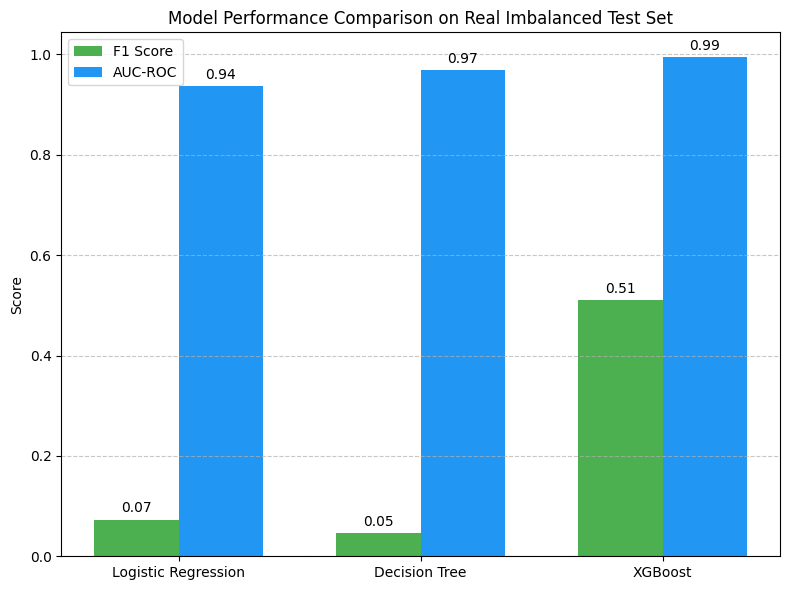

In [ ]:
# Performance Comparison

model_names = list(results.keys())
f1_scores = [results[m]['f1_score'] for m in model_names]
auc_scores = [results[m]['auc'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score', color='#4CAF50')
bar2 = ax.bar(x + width/2, auc_scores, width, label='AUC-ROC', color='#2196F3')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison on Real Imbalanced Test Set')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

for i, rect in enumerate(bar1 + bar2):
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Hyperparameter Tuning**

In [73]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(XGBClassifier(), params, cv=3, scoring='f1')
grid.fit(X_train, y_train)
print(f"Best F1 Score: {grid.best_score_:.4f}")

Best F1 Score: 0.9990


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(**grid.best_params_))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [76]:
import joblib

joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

**Findings**

**1. Fraud Ratio:** Only 0.13% of transactions are fraudulent, so highly imbalanced dataset.

**2. Fraud-prone types:** TRANSFER and CASH_OUT

**3. XGBoost** outperformed all.

**Risks**

**1.** XGBoost shows near perfect metrics.

**Improvements**

**1.** Use of deep learning model for better training.